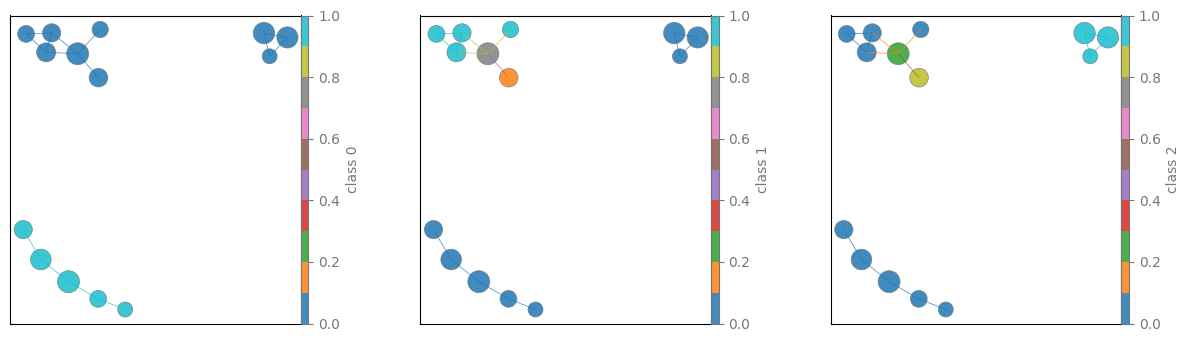

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from mapper.core import *
from mapper.cover import *
from mapper.clustering import *
from mapper.plot import *

import matplotlib

iris_data = load_iris()
X, y = iris_data.data, iris_data.target
lens = PCA(2).fit_transform(X)

mapper_algo = MapperAlgorithm(cover=CubicCover(n=10, perc=0.15), clustering=DBSCAN())
mapper_graph = mapper_algo.fit_transform(X, lens)
mapper_plot = MapperPlot(X, mapper_graph)

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for c in range(3):
    colored = mapper_plot.with_colors(colors=[1 if x == c else 0 for x in list(y)])
    colored.plot(axs[c], 'matplotlib', 512, 512, f'class {c}')


In [1]:

from sklearn.datasets import load_digits
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA

from mapper.core import *
from mapper.cover import *
from mapper.clustering import *
from mapper.plot import *

import matplotlib

diabetes_data = load_digits()
X, y = [np.array(x) for x in diabetes_data.data], diabetes_data.target
lens = PCA(2).fit_transform(X)
#lens = [np.array([np.sum(x)]) for x in X]

mapper_algo = MapperAlgorithm(cover=CubicCover(n=10, perc=0.25), clustering=KMeans(10, n_init='auto'))
mapper_graph = mapper_algo.fit_transform(X, lens)
ccs = build_connectivity(mapper_graph)
print(len(set(ccs.values())))


2


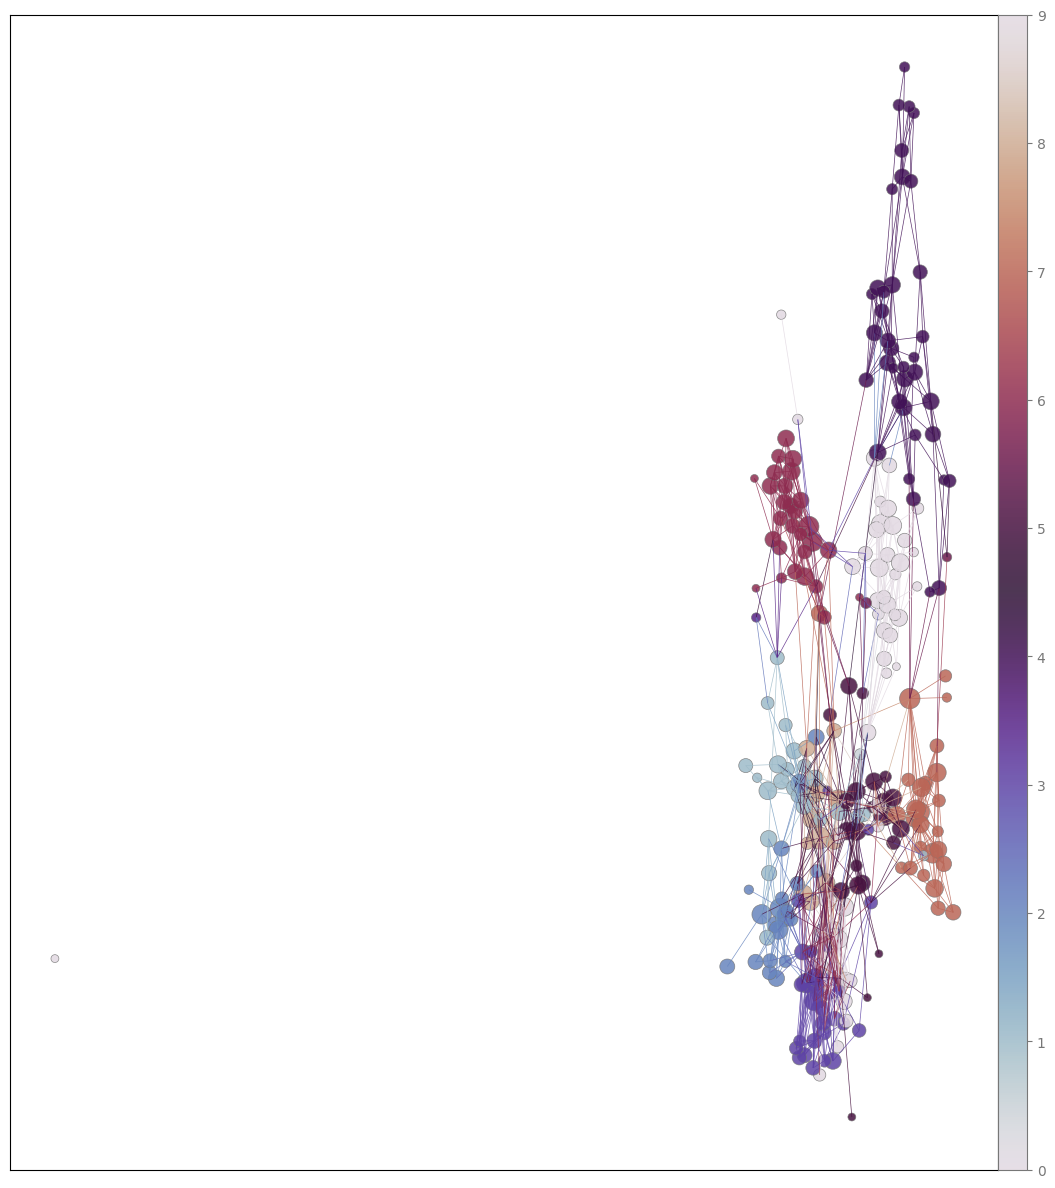

In [6]:

mapper_plot = MapperPlot(X, mapper_graph, iterations=100)

fig1, ax1 = plt.subplots(1, 1, figsize=(15, 15))
mapper_plot.with_colors(colors=y, cmap='twilight', agg=np.nanmedian).plot('matplotlib', ax=ax1)

mapper_plot.with_colors(colors=y, cmap='twilight', agg=np.nanmedian).plot('plotly', width=1024, height=1024)

#mapper_plot.with_colors(colors=y, cmap='tealrose', agg=np.nanmedian).plot('plotly_3d', width=1024, height=1024)
